# Model REST API

The Model REST API provides an interface for transforming models in various ways. Here are some examples. The model REST API documentation is available at [http://34.230.33.149:8771/docs#/](http://34.230.33.149:8771/docs#/)

## Setup

We will need `requests` to send requests to the model api.

In [20]:
import requests
from mira.metamodel import Concept, ControlledConversion, NaturalConversion
from mira.modeling import TemplateModel

# rest_url = "http://127.0.0.1:8000"  # Local service
rest_url = "http://34.230.33.149:8771"

# Example TemplateModel
infected = Concept(name="infected population", identifiers={"ido": "0000511"})
susceptible = Concept(name="susceptible population", identifiers={"ido": "0000514"})
immune = Concept(name="immune population", identifiers={"ido": "0000592"})
controlled_conversion = ControlledConversion(
    controller=infected,
    subject=susceptible,
    outcome=infected,
)
natural_conversion = NaturalConversion(subject=infected, outcome=immune)
sir_template_model = TemplateModel(templates=[controlled_conversion, natural_conversion])
sir_template_model_dict = sir_template_model.dict()
print(sir_template_model.json())

{"templates": [{"type": "ControlledConversion", "controller": {"name": "infected population", "identifiers": {"ido": "0000511"}, "context": {}}, "subject": {"name": "susceptible population", "identifiers": {"ido": "0000514"}, "context": {}}, "outcome": {"name": "infected population", "identifiers": {"ido": "0000511"}, "context": {}}, "provenance": []}, {"type": "NaturalConversion", "subject": {"name": "infected population", "identifiers": {"ido": "0000511"}, "context": {}}, "outcome": {"name": "immune population", "identifiers": {"ido": "0000592"}, "context": {}}, "provenance": []}]}


## PetriNet

The `/api/to_petrinet` endpoint returns a PetriNet model based on the `TemplateModel` provided:

In [16]:
res = requests.post(rest_url + "/api/to_petrinet", json=sir_template_model_dict)
print(res.json())

{'S': [{'sname': 'susceptible population'}, {'sname': 'infected population'}, {'sname': 'immune population'}], 'T': [{'tname': "('susceptible population', 'infected population', 'infected population', 'ControlledConversion')"}, {'tname': "('infected population', 'immune population', 'NaturalConversion')"}], 'I': [{'is': 2, 'it': 1}, {'is': 1, 'it': 1}, {'is': 2, 'it': 2}], 'O': [{'os': 2, 'ot': 1}, {'os': 2, 'ot': 1}, {'os': 3, 'ot': 2}]}


## Model Stratification

The `/api/stratify` endpoint can stratify a model. In this example, the stratification is along two cities, effectively creating a two-city SIR model from the original SIR model:

In [17]:
res = requests.post(rest_url + "/api/stratify", json={"template_model": sir_template_model_dict, "key": "city", "strata": ["Boston", "New York City"]})
print(res.json())

{'templates': [{'type': 'ControlledConversion', 'controller': {'name': 'infected population', 'identifiers': {'ido': '0000511'}, 'context': {'city': 'New York City'}}, 'subject': {'name': 'susceptible population', 'identifiers': {'ido': '0000514'}, 'context': {'city': 'New York City'}}, 'outcome': {'name': 'infected population', 'identifiers': {'ido': '0000511'}, 'context': {'city': 'New York City'}}, 'provenance': []}, {'type': 'NaturalConversion', 'subject': {'name': 'infected population', 'identifiers': {'ido': '0000511'}, 'context': {'city': 'New York City'}}, 'outcome': {'name': 'immune population', 'identifiers': {'ido': '0000592'}, 'context': {'city': 'New York City'}}, 'provenance': []}, {'type': 'ControlledConversion', 'controller': {'name': 'infected population', 'identifiers': {'ido': '0000511'}, 'context': {'city': 'Boston'}}, 'subject': {'name': 'susceptible population', 'identifiers': {'ido': '0000514'}, 'context': {'city': 'Boston'}}, 'outcome': {'name': 'infected popula

## Graphviz dot File

The `/api/viz/to_dot_file` endpoint takes a `TemplateModel` and returns a graphviz dotfile of the provided model:

In [18]:
res = requests.post(rest_url + "/api/viz/to_dot_file", json=sir_template_model_dict)
print(res.text)

strict digraph "" {
	graph [bb="0,0,231.38,280"];
	node [label="\N"];
	"susceptible population"	[height=0.5,
		label="susceptible population",
		pos="115.69,262",
		shape=oval,
		width=3.2136];
	T1	[color=blue,
		fillcolor=blue,
		fixedsize=true,
		height=0.19444,
		label="",
		pos="115.69,201",
		shape=square,
		style=filled,
		width=0.19444];
	"susceptible population" -> T1	[pos="e,115.69,208.22 115.69,243.93 115.69,235.89 115.69,226.33 115.69,218.37"];
	"infected population"	[height=0.5,
		label="infected population",
		pos="115.69,140",
		shape=oval,
		width=2.7984];
	T1 -> "infected population"	[pos="e,109.51,158.02 111.32,193.69 109.58,187.49 108.8,177.59 108.96,168.05"];
	"infected population" -> T1	[color=blue,
		pos="e,120.06,193.69 121.87,158.02 122.66,166.13 122.63,175.79 121.79,183.8"];
	T0	[color=blue,
		fillcolor=blue,
		fixedsize=true,
		height=0.19444,
		label="",
		pos="115.69,79",
		shape=square,
		style=filled,
		width=0.19444];
	"infected population" -> T0	[pos="e,1

## Graph image

The `/api/viz/to_image` endpoint returns an image of the model as a graph structure.

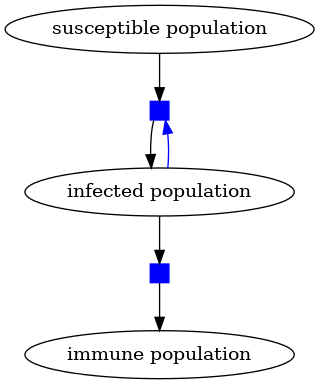

In [19]:
res = requests.post(rest_url + "/api/viz/to_image", json=sir_template_model_dict)
with open("./graph.png", "wb") as fio:
    fio.write(res.content)

from IPython.display import Image
Image(filename="./graph.png")